# Kalorimetrie Laborversuch

Author: Vladimir Pascari

Datum: 03.12.2023

Gruppe: 14

## Forschungsfrage

Feststellung der Wärmekapazität verschiedener Werkstoffe mit Hilfe einer Kalorimeterkonstante.

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Nutzen Sie hier Ihr eigenes Bild.\
Versuchsaufbau:\
-Temperatursensoren: 3 im Kalorimeter, einer in der Umgebung und einer im Wasserbad\
-Wasserkocher im Wasserbad\
-Wasserkocher im Kalorimeter\
-Elektrischer Laborrührer\
-Waage\
-3 Proben\
Versuchdurchführung:\
1. Bestimmung der Kalorimeterkonstante\
Die Temperatur im Kalorimeter mit 400 g Wasser wird gemessen. Durch die mit dem Heizer zugefügten Wärme (durch die Leistung bestimmt) und die finale Temperatur des Wassers, kann man die Kalorimeterkonstante bestimmen.


2. Bestimmung der Wärmekapazitäten der Proben
Die proben werden im Wasserbad auf die konstante Temperatur von 80 grad Celsius erwärmt. Die Proben werden im Kalorimeter mit gleicher Wassermenge wie vorher getaucht. Mit der Temperaturmessung im Kalorimeter wird die Einstellung einer konstanten Temperatur beobachtet (thermischer Ausgleich). Da sowohl die Anfangsbedingungen als auch die Endbedingungen des Wassers und der Probe bekannt sind, kann man die Wärmekapazität berechnen.

![Setup](figures/Setup.jpg)


## Versuchsauswertung

In [49]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [50]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/Constant/Constant.h5"

# DONE #

In [51]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, "RawData")

# DONE #

{'temperature': array([[20.4375, 20.4375, 20.5   , 20.5   , 20.5   , 20.5   , 20.5   ,
        20.5   , 20.4375, 20.4375, 20.4375, 20.5   , 20.5   , 20.5625,
        20.5625, 20.6875, 20.75  , 20.875 , 20.9375, 21.0625, 21.0625,
        21.1875, 21.3125, 21.375 , 21.375 , 21.5625, 21.625 , 21.6875,
        21.75  , 21.875 , 22.    , 22.0625, 22.125 , 22.1875, 22.25  ,
        22.4375, 22.4375, 22.5   , 22.625 , 22.6875, 22.75  , 22.8125,
        22.9375, 23.0625, 23.0625, 23.1875, 23.3125, 23.3125, 23.5   ,
        23.5   , 23.625 , 23.75  , 23.75  , 23.875 , 23.9375, 24.    ,
        24.125 , 24.1875, 24.3125, 24.375 , 24.5   , 24.5   , 24.5625,
        24.6875, 24.75  , 24.9375, 25.    , 25.0625, 25.0625, 25.0625,
        25.125 , 25.1875, 25.1875, 25.1875],
       [20.5625, 20.625 , 20.5625, 20.625 , 20.625 , 20.625 , 20.625 ,
        20.625 , 20.625 , 20.625 , 20.5625, 20.625 , 20.6875, 20.75  ,
        20.75  , 20.8125, 20.9375, 21.    , 21.0625, 21.125 , 21.25  ,
        21.3125,

In [52]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0, 1, 2]
index_environment = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [53]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_environment])

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

No handles with labels found to put in legend.


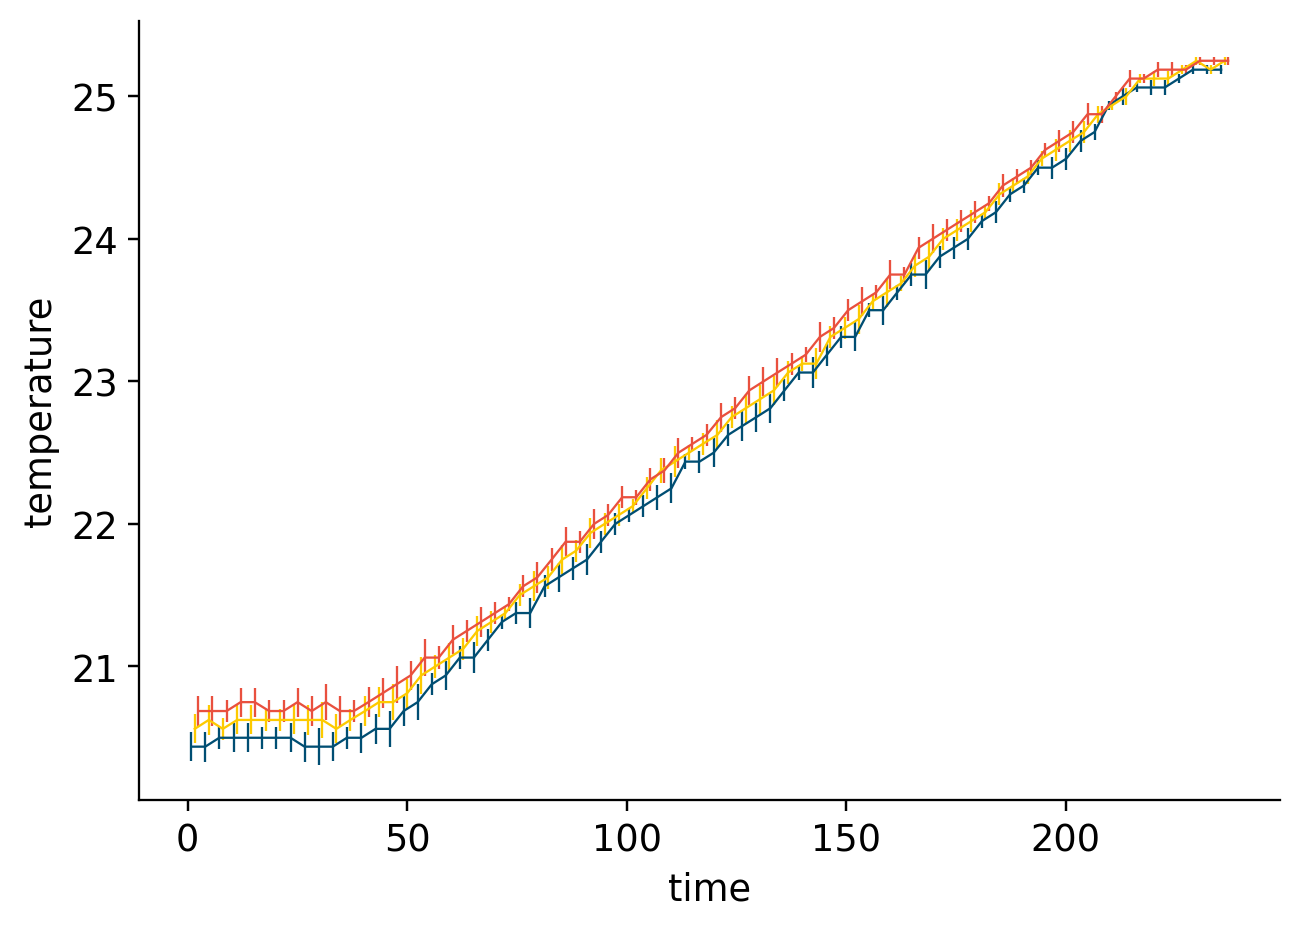

In [54]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature" )

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [55]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.
import json
path_c = "data/Constant/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json"
with open(path_c, 'r') as f:
  cal = json.load(f)
print(cal["calorimeter"]["medium"]["mass"]["value"])

water_mass = cal["calorimeter"]["medium"]["mass"]["value"]
print(water_mass)

# DONE #

400
400


In [56]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.
f = h5.File(datafile_path_const, "r") 
    
a = f["RawData"]
b = list(a)[0]
a = a[b]
print(b)
    
b= list(a)[0]

current = a["current"][()]
heat_time = a["heat_time"][()]
voltage = a["voltage"][()]
print(current)
print(heat_time)
print(voltage)
# DONE #

1ee21744-0355-6023-94b4-d5c041dd32cd
4.0
180.0
12.7


#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [57]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
threshold = 30/data_dict["timestamp"][0][-1]
temperature_end, temperature_start = utility.get_start_end_temperature(mean_std_calorimeter[0], threshold) 
print(temperature_end)
print(temperature_start)
# DONE #

25.119791666666668
20.599537037037038


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [58]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = voltage*current*180/(temperature_end-temperature_start)
print(calorimeter_const)
# DONE #

2022.8948918192293


#### (Vii) Ergebnis

In [59]:
calorimeter_const

2022.8948918192293

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [60]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/011/011.h5"

# DONE #

In [61]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1, "RawData")

# DONE #

{'temperature': array([[20.8125, 20.8125, 20.75  , 20.75  , 20.75  , 20.75  , 20.8125,
        20.6875, 20.75  , 20.75  , 20.8125, 21.8125, 23.4375, 24.8125,
        25.75  , 26.3125, 26.3125, 26.3125, 27.375 , 27.5   , 27.625 ,
        27.5625, 27.75  , 27.75  , 27.75  , 27.75  , 27.75  , 27.75  ,
        27.75  , 27.75  , 27.8125, 27.75  , 27.75  , 27.75  , 27.75  ,
        27.75  , 27.6875, 27.75  ],
       [20.875 , 20.875 , 20.875 , 20.875 , 20.875 , 20.9375, 20.9375,
        20.875 , 20.9375, 20.875 , 21.    , 22.25  , 23.75  , 25.    ,
        25.9375, 26.5625, 27.    , 27.25  , 27.4375, 27.625 , 27.6875,
        27.75  , 27.75  , 27.75  , 27.8125, 27.8125, 27.8125, 27.8125,
        27.8125, 27.8125, 27.8125, 27.8125, 27.8125, 27.8125, 27.8125,
        27.8125, 27.8125, 27.8125],
       [20.9375, 20.9375, 21.    , 21.    , 20.9375, 20.9375, 20.9375,
        20.9375, 21.    , 21.    , 21.3125, 22.6875, 24.1875, 25.375 ,
        26.1875, 26.75  , 27.125 , 27.375 , 27.5625, 27.625 

In [62]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [63]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

No handles with labels found to put in legend.


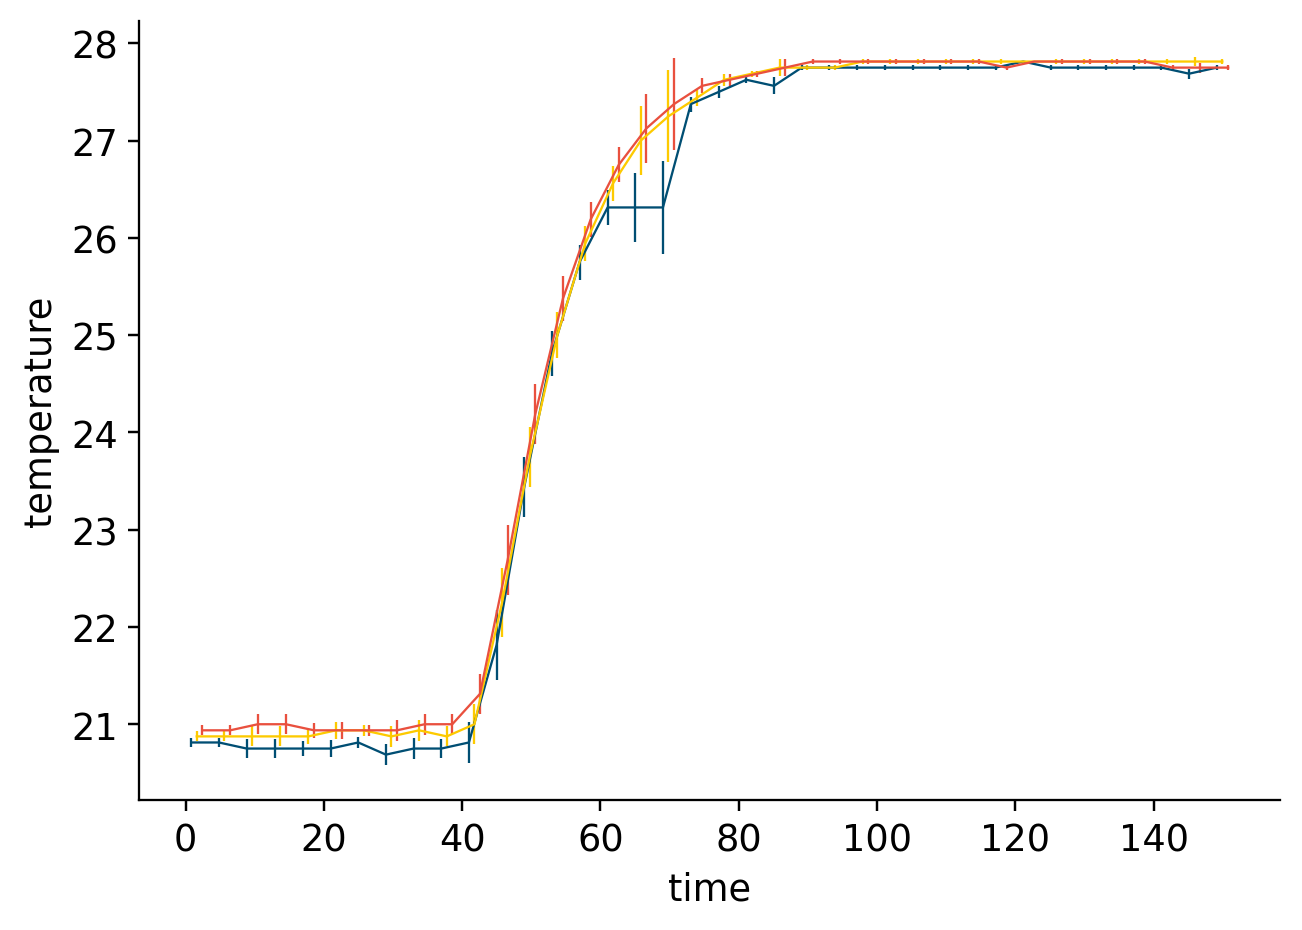

In [64]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature" )

# DONE #

#### (iv) Metadaten auslesen

In [65]:
# TODO: Read mass of the sample from the metadata of the experiment.
path_p = "data/011/probe_PDC011_1ee57b37-1b00-6b47-b00e-8332e0df15ea.json"
with open(path_p, 'r') as f:
  pr = json.load(f)
sample_mass = pr["probe"]["mass"]["value"]
print(sample_mass)

# DONE #

680


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [66]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity
threshold = 33/data_dict["timestamp"][0][-1]
temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0], threshold) 
print(temperature_mix, temperature_start_water)
# DONE #

27.78571428571429 20.869791666666668


In [67]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][0:10])
print(temperature_start_sample)


# DONE #

79.58552631578948


#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [68]:
# TODO: Calulate specific heat capacity of the sample.
sample_mass_kg = sample_mass/1000
sample_heat_capa = calorimeter_const*(temperature_mix-temperature_start_water)/(sample_mass_kg*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [70]:
print(sample_heat_capa)
cap_011 = 377
error011 = abs(sample_heat_capa-cap_011)/cap_011*100
print(error011)

397.1790627281716
5.352536532671505


### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [71]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "data/004/004.h5"

# DONE #

In [72]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2, "RawData")

# DONE #

{'temperature': array([[18.    , 17.9375, 18.    , 17.9375, 18.    , 18.    , 17.9375,
        18.    , 18.    , 18.    , 18.375 , 19.8125, 21.25  , 22.5625,
        23.5625, 24.3125, 24.9375, 25.3125, 25.3125, 25.9375, 26.125 ,
        26.3125, 26.375 , 26.4375, 26.4375, 26.5   , 26.5   , 26.6875,
        26.5625, 26.625 , 26.625 , 26.625 , 26.625 , 26.5625, 26.5   ,
        26.5625, 26.5625, 26.5625, 26.5625, 26.5625, 26.625 ],
       [18.25  , 18.25  , 18.1875, 18.1875, 18.1875, 18.125 , 18.125 ,
        18.1875, 18.1875, 18.1875, 18.75  , 20.25  , 21.6875, 22.9375,
        23.875 , 24.5625, 25.0625, 25.5   , 25.8125, 26.    , 26.1875,
        26.3125, 26.4375, 26.5   , 26.5   , 26.5625, 26.625 , 26.625 ,
        26.6875, 26.6875, 26.6875, 26.625 , 26.6875, 26.6875, 26.6875,
        26.6875, 26.6875, 26.625 , 26.6875, 26.6875, 26.625 ],
       [18.3125, 18.3125, 18.3125, 18.25  , 18.25  , 18.25  , 18.25  ,
        18.25  , 18.25  , 18.25  , 19.1875, 20.75  , 22.1875, 23.3125,
      

In [73]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [74]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

No handles with labels found to put in legend.


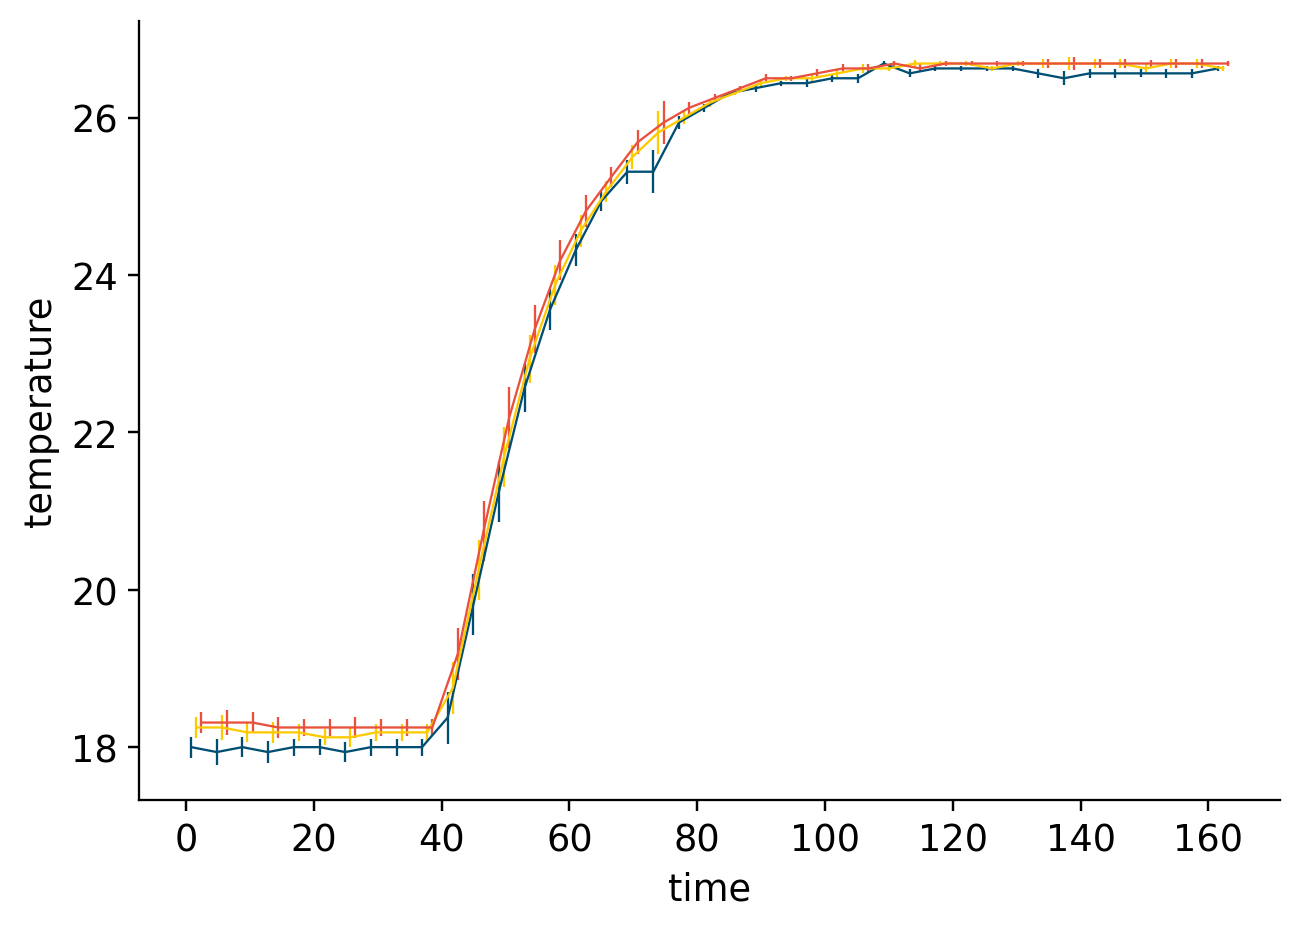

In [75]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature")

# DONE #

#### (iv) Metadaten auslesen

In [76]:
# TODO: Read mass of the sample from the metadata of the experiment.

path_p = "data/004/probe_PDC004_1ee57b2f-bfd6-6c0e-a6ed-d099248c61ab.json"
with open(path_p, 'r') as f:
  pr = json.load(f)
sample_mass = pr["probe"]["mass"]["value"]
print(sample_mass)

# DONE #

630


#### (v) Anfangs- und Endwert der Temperatur

In [77]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

threshold = 33/data_dict["timestamp"][0][-1]
temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0], threshold) 
print(temperature_mix, temperature_start_water)

# DONE #

26.639880952380956 18.145833333333336


In [78]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][0:10])
print(temperature_start_sample)

# DONE #

79.6189024390244


#### (vi) spezifische Wärmekapazität bestimmen

In [79]:
# TODO: Calulate specific heat capacity of the sample.

sample_mass_kg = sample_mass/1000
sample_heat_capa = calorimeter_const*(temperature_mix-temperature_start_water)/(sample_mass_kg*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [80]:
print(sample_heat_capa)
cap_004 = 500
error004 = abs(sample_heat_capa-cap_004)/cap_004*100
print(error004)

514.8059135358671
2.9611827071734296


### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [81]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/021/021.h5"

# DONE #

In [82]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, "RawData")

# DONE #

{'temperature': array([[18.125 , 18.125 , 18.125 , 18.125 , 18.0625, 18.0625, 18.125 ,
        18.0625, 18.0625, 18.125 , 18.125 , 18.125 , 18.1875, 18.4375,
        18.6875, 18.6875, 19.125 , 19.3125, 19.5625, 19.75  , 19.875 ,
        20.    , 20.1875, 20.25  , 20.375 , 20.5   , 20.5   , 20.625 ,
        20.6875, 20.75  , 20.8125, 20.875 , 21.0625, 21.0625, 21.0625,
        21.125 , 21.25  , 21.3125, 21.3125, 21.375 , 21.375 , 21.4375,
        21.375 , 21.4375, 21.4375],
       [18.25  , 18.25  , 18.3125, 18.3125, 18.3125, 18.3125, 18.3125,
        18.3125, 18.3125, 18.3125, 18.3125, 18.375 , 18.4375, 18.6875,
        18.9375, 19.1875, 19.375 , 19.5625, 19.75  , 19.9375, 20.0625,
        20.1875, 20.3125, 20.4375, 20.5625, 20.625 , 20.6875, 20.8125,
        20.875 , 20.9375, 21.    , 21.0625, 21.125 , 21.1875, 21.25  ,
        21.3125, 21.3125, 21.375 , 21.375 , 21.4375, 21.5   , 21.5   ,
        21.5   , 21.5625, 21.5   ],
       [18.375 , 18.375 , 18.375 , 18.375 , 18.4375, 18.4375

In [83]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [84]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])
# DONE #

#### (iii) Daten ploten

No handles with labels found to put in legend.


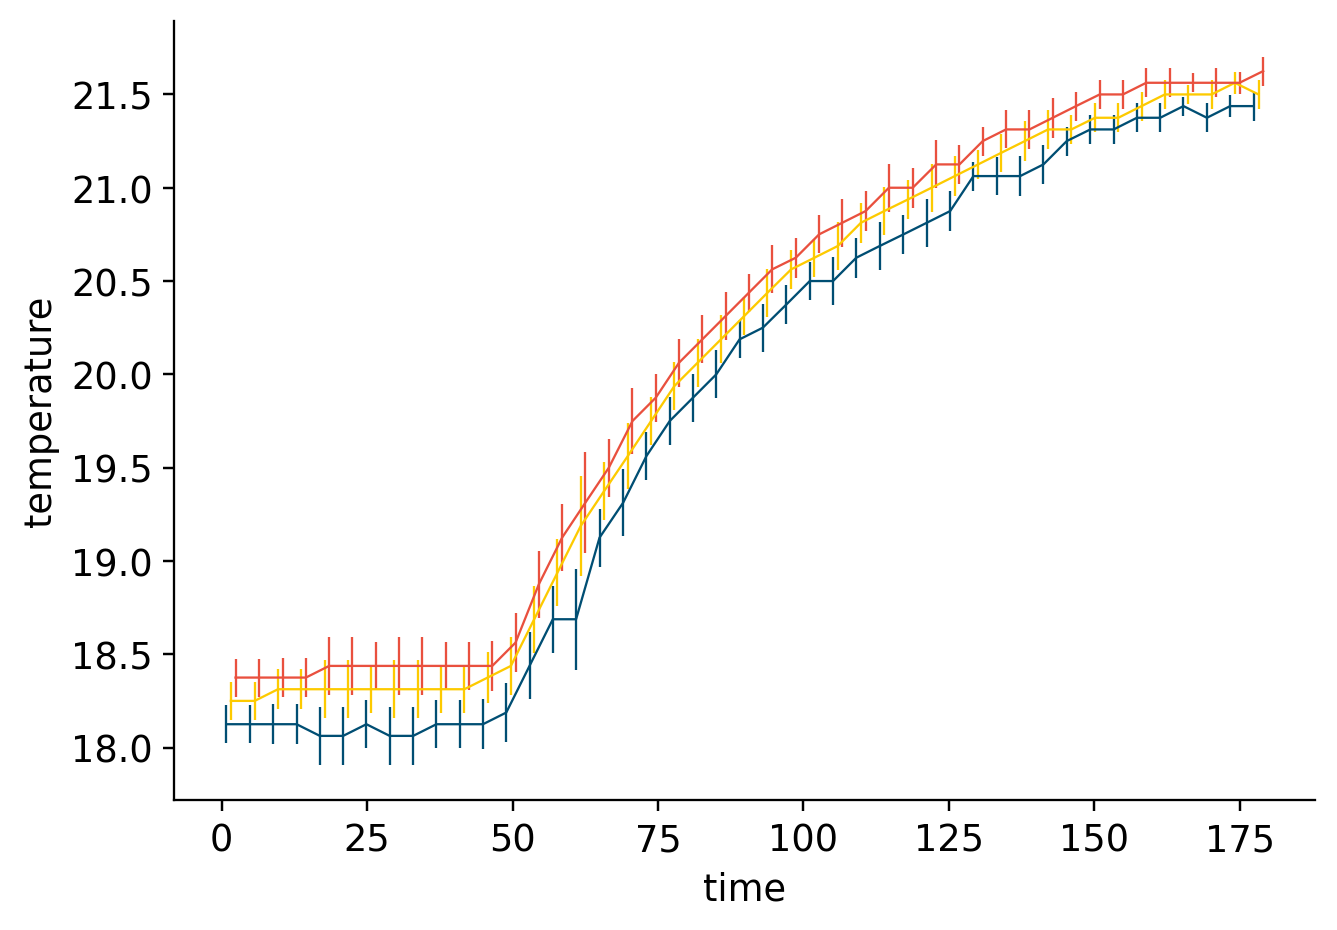

In [85]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature")

# DONE #

#### (iv) Metadaten auslesen

In [86]:
# TODO: Read mass of the sample from the metadata of the experiment.

path_p = "data/021/probe_PDC021_1ee7d43e-ed51-67b7-aaf7-4039bdd3ee1e.json"
with open(path_p, 'r') as f:
  pr = json.load(f)
sample_mass = pr["probe"]["mass"]["value"]
print(sample_mass)

# DONE #

380


#### (v) Anfangs- und Endwert der Temperatur

In [87]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

threshold = 33/data_dict["timestamp"][0][-1]
temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0], threshold) 
print(temperature_mix, temperature_start_water)

# DONE #

21.461309523809526 18.268229166666664


In [88]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][0:10])
print(temperature_start_sample)

# DONE #

79.57777777777778


#### (vi) spezifische Wärmekapazität bestimmen

In [89]:
# TODO: Calulate specific heat capacity of the sample.

sample_mass_kg = sample_mass/1000
sample_heat_capa = calorimeter_const*(temperature_mix-temperature_start_water)/(sample_mass_kg*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [91]:
print(sample_heat_capa)
cap_021 = 2000
error021 = abs(sample_heat_capa-cap_021)/cap_021*100
print(error021)

292.48281568721717
85.37585921563914


## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

Die Ergebnisse für die erste zwei Proben sind qualitativ mit einem Fehler unter 6 % für beide im Vergleich mit Werten aus öffentlichen Quellen. Der 12g Zuschuss am Wasser für die zweite Probe, was nachgemessen wurde, hatte keinen wesentlichen Einfluss. Ein großer Fehler von 85% ergibt sich aber für die ABS-Probe. Im Versuch mit der ABS Probe wurde eine Verlust von 2g Wasser festgestellt. Das kann aber den Fehler nicht erklären. Eine theoretische Erklärung für diese Tatsache ist die schlechte Wärmeübertragung von Kunsstoffen, die oftmals als wärmeisolierend beschreieben werden. Somit wäre es möglich, dass nur der Rand der Probe abgekühlt wurde, und der Kern immernoch warm war. Aufgrund des langsamen Wärmeaustausch, konnte man das aber während der Messung nicht erkennen. Wenn das der Grund ist, dann braucht mann viel mehr Zeit für die Probe in Kalorimeter, damit ein eigentlicher thermischer Ausgleich stattfindet.


## Fazit
Der Versuch hat gute Ergebnisse für die metallischen Proben geliefert. Für die Kunsstoff Probe muss mann die schlechte Wärmeleitung berücksichtigen, und die dauer des Versuches anpassen. 